In [48]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/coronavirusdataset/TimeGender.csv
/kaggle/input/coronavirusdataset/Case.csv
/kaggle/input/coronavirusdataset/Region.csv
/kaggle/input/coronavirusdataset/TimeProvince.csv
/kaggle/input/coronavirusdataset/SearchTrend.csv
/kaggle/input/coronavirusdataset/Policy.csv
/kaggle/input/coronavirusdataset/SeoulFloating.csv
/kaggle/input/coronavirusdataset/Time.csv
/kaggle/input/coronavirusdataset/PatientInfo.csv
/kaggle/input/coronavirusdataset/Weather.csv
/kaggle/input/coronavirusdataset/TimeAge.csv


In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
print('Imported successfully')

Imported successfully


In [50]:
case_csv=pd.read_csv('../input/coronavirusdataset/Case.csv')
case_csv.head(10)


,case_id,province,city,group,infection_case,confirmed,latitude,longitude
0,1000001,Seoul,Yongsan-gu,True,Itaewon Clubs,139,37.538621,126.992652
1,1000002,Seoul,Gwanak-gu,True,Richway,119,37.48208,126.901384
2,1000003,Seoul,Guro-gu,True,Guro-gu Call Center,95,37.508163,126.884387
3,1000004,Seoul,Yangcheon-gu,True,Yangcheon Table Tennis Club,43,37.546061,126.874209
4,1000005,Seoul,Dobong-gu,True,Day Care Center,43,37.679422,127.044374
5,1000006,Seoul,Guro-gu,True,Manmin Central Church,41,37.481059,126.894343
6,1000007,Seoul,from other city,True,SMR Newly Planted Churches Group,36,-,-
7,1000008,Seoul,Dongdaemun-gu,True,Dongan Church,17,37.592888,127.056766
8,1000009,Seoul,from other city,True,Coupang Logistics Center,25,-,-
9,1000010,Seoul,Gwanak-gu,True,Wangsung Church,30,37.481735,126.930121


In [51]:
patientinfo_csv=pd.read_csv('../input/coronavirusdataset/PatientInfo.csv')
patientinfo_csv.head(10)

,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,male,30s,Korea,Seoul,Jungnang-gu,overseas inflow,NaN,31,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,male,50s,Korea,Seoul,Jongno-gu,contact with patient,2002000001,17,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,male,20s,Korea,Seoul,Mapo-gu,overseas inflow,NaN,9,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,female,20s,Korea,Seoul,Seongbuk-gu,contact with patient,1000000002,2,NaN,2020-01-31,2020-02-24,NaN,released
5,1000000006,female,50s,Korea,Seoul,Jongno-gu,contact with patient,1000000003,43,NaN,2020-01-31,2020-02-19,NaN,released
6,1000000007,male,20s,Korea,Seoul,Jongno-gu,contact with patient,1000000003,0,NaN,2020-01-31,2020-02-10,NaN,released
7,1000000008,male,20s,Korea,Seoul,etc,overseas inflow,NaN,0,NaN,2020-02-02,2020-02-24,NaN,released
8,1000000009,male,30s,Korea,Seoul,Songpa-gu,overseas inflow,NaN,68,NaN,2020-02-05,2020-02-21,NaN,released
9,1000000010,female,60s,Korea,Seoul,Seongbuk-gu,contact with patient,1000000003,6,NaN,2020-02-05,2020-02-29,NaN,released


In [52]:
policy_csv=pd.read_csv('../input/coronavirusdataset/Policy.csv')
policy_csv.head(10)

,policy_id,country,type,gov_policy,detail,start_date,end_date
0,1,Korea,Alert,Infectious Disease Alert Level,Level 1 (Blue),2020-01-03,2020-01-19
1,2,Korea,Alert,Infectious Disease Alert Level,Level 2 (Yellow),2020-01-20,2020-01-27
2,3,Korea,Alert,Infectious Disease Alert Level,Level 3 (Orange),2020-01-28,2020-02-22
3,4,Korea,Alert,Infectious Disease Alert Level,Level 4 (Red),2020-02-23,NaN
4,5,Korea,Immigration,Special Immigration Procedure,from China,2020-02-04,NaN
5,6,Korea,Immigration,Special Immigration Procedure,from Hong Kong,2020-02-12,NaN
6,7,Korea,Immigration,Special Immigration Procedure,from Macau,2020-02-12,NaN
7,8,Korea,Immigration,Special Immigration Procedure,from Japan,2020-03-09,NaN
8,9,Korea,Immigration,Special Immigration Procedure,from Italy,2020-03-12,NaN
9,10,Korea,Immigration,Special Immigration Procedure,from Iran,2020-03-12,NaN


In [53]:
region_csv=pd.read_csv('../input/coronavirusdataset/Region.csv')
region_csv.head(10)

,code,province,city,latitude,longitude,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,nursing_home_count
0,10000,Seoul,Seoul,37.566953,126.977977,607,830,48,1.44,15.38,5.8,22739
1,10010,Seoul,Gangnam-gu,37.518421,127.047222,33,38,0,4.18,13.17,4.3,3088
2,10020,Seoul,Gangdong-gu,37.530492,127.123837,27,32,0,1.54,14.55,5.4,1023
3,10030,Seoul,Gangbuk-gu,37.639938,127.025508,14,21,0,0.67,19.49,8.5,628
4,10040,Seoul,Gangseo-gu,37.551166,126.849506,36,56,1,1.17,14.39,5.7,1080
5,10050,Seoul,Gwanak-gu,37.478290,126.951502,22,33,1,0.89,15.12,4.9,909
6,10060,Seoul,Gwangjin-gu,37.538712,127.082366,22,33,3,1.16,13.75,4.8,723
7,10070,Seoul,Guro-gu,37.495632,126.887650,26,34,3,1.00,16.21,5.7,741
8,10080,Seoul,Geumcheon-gu,37.456852,126.895229,18,19,0,0.96,16.15,6.7,475
9,10090,Seoul,Nowon-gu,37.654259,127.056294,42,66,6,1.39,15.40,7.4,952


In [54]:
searchtrend_csv=pd.read_csv('../input/coronavirusdataset/SearchTrend.csv')
searchtrend_csv.head(10)

,date,cold,flu,pneumonia,coronavirus
0,2016-01-01,0.11663,0.05590,0.15726,0.00736
1,2016-01-02,0.13372,0.17135,0.20826,0.00890
2,2016-01-03,0.14917,0.22317,0.19326,0.00845
3,2016-01-04,0.17463,0.18626,0.29008,0.01145
4,2016-01-05,0.17226,0.15072,0.24562,0.01381
5,2016-01-06,0.17272,0.14399,0.25081,0.01381
6,2016-01-07,0.17390,0.12408,0.25135,0.01190
7,2016-01-08,0.16735,0.12499,0.29044,0.01572
8,2016-01-09,0.13463,0.10190,0.24390,0.01036
9,2016-01-10,0.15135,0.33062,0.21108,0.00699


In [55]:
seoulfloating_csv=pd.read_csv('../input/coronavirusdataset/SeoulFloating.csv')
seoulfloating_csv.head(10)

,date,hour,birth_year,sex,province,city,fp_num
0,2020-01-01,0,20,female,Seoul,Dobong-gu,19140
1,2020-01-01,0,20,male,Seoul,Dobong-gu,19950
2,2020-01-01,0,20,female,Seoul,Dongdaemun-gu,25450
3,2020-01-01,0,20,male,Seoul,Dongdaemun-gu,27050
4,2020-01-01,0,20,female,Seoul,Dongjag-gu,28880
5,2020-01-01,0,20,male,Seoul,Dongjag-gu,30350
6,2020-01-01,0,20,female,Seoul,Eunpyeong-gu,27750
7,2020-01-01,0,20,male,Seoul,Eunpyeong-gu,27910
8,2020-01-01,0,20,female,Seoul,Gangbuk-gu,19490
9,2020-01-01,0,20,male,Seoul,Gangbuk-gu,21940


In [56]:
time_csv=pd.read_csv('../input/coronavirusdataset/Time.csv')
time_csv.head(10)

,date,time,test,negative,confirmed,released,deceased
0,2020-01-20,16,1,0,1,0,0
1,2020-01-21,16,1,0,1,0,0
2,2020-01-22,16,4,3,1,0,0
3,2020-01-23,16,22,21,1,0,0
4,2020-01-24,16,27,25,2,0,0
5,2020-01-25,16,27,25,2,0,0
6,2020-01-26,16,51,47,3,0,0
7,2020-01-27,16,61,56,4,0,0
8,2020-01-28,16,116,97,4,0,0
9,2020-01-29,16,187,155,4,0,0


In [57]:
timeage_csv=pd.read_csv('../input/coronavirusdataset/TimeAge.csv')
timeage_csv.head(10)

,date,time,age,confirmed,deceased
0,2020-03-02,0,0s,32,0
1,2020-03-02,0,10s,169,0
2,2020-03-02,0,20s,1235,0
3,2020-03-02,0,30s,506,1
4,2020-03-02,0,40s,633,1
5,2020-03-02,0,50s,834,5
6,2020-03-02,0,60s,530,6
7,2020-03-02,0,70s,192,6
8,2020-03-02,0,80s,81,3
9,2020-03-03,0,0s,34,0


In [58]:
timegender_csv=pd.read_csv('../input/coronavirusdataset/TimeGender.csv')
timegender_csv.head(10)

,date,time,sex,confirmed,deceased
0,2020-03-02,0,male,1591,13
1,2020-03-02,0,female,2621,9
2,2020-03-03,0,male,1810,16
3,2020-03-03,0,female,3002,12
4,2020-03-04,0,male,1996,20
5,2020-03-04,0,female,3332,12
6,2020-03-05,0,male,2149,21
7,2020-03-05,0,female,3617,14
8,2020-03-06,0,male,2345,25
9,2020-03-06,0,female,3939,17


In [59]:
timeprovince_csv=pd.read_csv('../input/coronavirusdataset/TimeProvince.csv')
timeprovince_csv.head(10)

,date,time,province,confirmed,released,deceased
0,2020-01-20,16,Seoul,0,0,0
1,2020-01-20,16,Busan,0,0,0
2,2020-01-20,16,Daegu,0,0,0
3,2020-01-20,16,Incheon,1,0,0
4,2020-01-20,16,Gwangju,0,0,0
5,2020-01-20,16,Daejeon,0,0,0
6,2020-01-20,16,Ulsan,0,0,0
7,2020-01-20,16,Sejong,0,0,0
8,2020-01-20,16,Gyeonggi-do,0,0,0
9,2020-01-20,16,Gangwon-do,0,0,0


In [60]:
weather_csv=pd.read_csv('../input/coronavirusdataset/Weather.csv')
weather_csv.head(10)

,code,province,date,avg_temp,min_temp,max_temp,precipitation,max_wind_speed,most_wind_direction,avg_relative_humidity
0,10000,Seoul,2016-01-01,1.2,-3.3,4.0,0.0,3.5,90.0,73.0
1,11000,Busan,2016-01-01,5.3,1.1,10.9,0.0,7.4,340.0,52.1
2,12000,Daegu,2016-01-01,1.7,-4.0,8.0,0.0,3.7,270.0,70.5
3,13000,Gwangju,2016-01-01,3.2,-1.5,8.1,0.0,2.7,230.0,73.1
4,14000,Incheon,2016-01-01,3.1,-0.4,5.7,0.0,5.3,180.0,83.9
5,15000,Daejeon,2016-01-01,1.6,-4.2,7.7,0.0,4.4,320.0,77.4
6,16000,Ulsan,2016-01-01,4.0,-1.6,12.0,0.0,2.7,320.0,53.3
7,20000,Gyeonggi-do,2016-01-01,1.6,-4.2,5.7,0.0,2.1,180.0,80.1
8,30000,Gangwon-do,2016-01-01,5.1,2.1,8.9,0.0,9.6,290.0,33.0
9,40000,Chungcheongbuk-do,2016-01-01,-1.0,-5.9,4.1,0.0,1.6,110.0,79.4


In [61]:
weather_csv.shape

(26271, 10)

In [62]:
case_csv.shape

(174, 8)

In [63]:
patientinfo_csv.shape

(5165, 14)

In [64]:
policy_csv.shape

(61, 7)

In [65]:
region_csv.shape

(244, 12)

In [66]:
searchtrend_csv.shape

(1642, 5)

In [67]:
seoulfloating_csv.shape

(1084800, 7)

In [68]:
time_csv.shape

(163, 7)

In [69]:
timeage_csv.shape

(1089, 5)

In [70]:
timegender_csv.shape

(242, 5)

In [71]:
timeprovince_csv.shape

(2771, 6)

In [72]:
weather_csv.drop(['code','min_temp','max_temp','precipitation','max_wind_speed','most_wind_direction','avg_relative_humidity'],axis=1,inplace=True)

In [73]:
weather_csv.head(10)

,province,date,avg_temp
0,Seoul,2016-01-01,1.2
1,Busan,2016-01-01,5.3
2,Daegu,2016-01-01,1.7
3,Gwangju,2016-01-01,3.2
4,Incheon,2016-01-01,3.1
5,Daejeon,2016-01-01,1.6
6,Ulsan,2016-01-01,4.0
7,Gyeonggi-do,2016-01-01,1.6
8,Gangwon-do,2016-01-01,5.1
9,Chungcheongbuk-do,2016-01-01,-1.0


In [74]:
timeprovince_csv.drop(['date','time','released'],axis=1,inplace=True)

In [75]:
timeprovince_csv.head(10)

,province,confirmed,deceased
0,Seoul,0,0
1,Busan,0,0
2,Daegu,0,0
3,Incheon,1,0
4,Gwangju,0,0
5,Daejeon,0,0
6,Ulsan,0,0
7,Sejong,0,0
8,Gyeonggi-do,0,0
9,Gangwon-do,0,0


In [76]:
timegender_csv.drop(['date','time'],axis=1,inplace=True)

In [77]:
timegender_csv.head(10)

,sex,confirmed,deceased
0,male,1591,13
1,female,2621,9
2,male,1810,16
3,female,3002,12
4,male,1996,20
5,female,3332,12
6,male,2149,21
7,female,3617,14
8,male,2345,25
9,female,3939,17


In [78]:
timeage_csv.drop(['date','time'],axis=1,inplace=True)

In [79]:
timeage_csv.head(10)

,age,confirmed,deceased
0,0s,32,0
1,10s,169,0
2,20s,1235,0
3,30s,506,1
4,40s,633,1
5,50s,834,5
6,60s,530,6
7,70s,192,6
8,80s,81,3
9,0s,34,0


In [80]:
time_csv.drop(['date','time','released','deceased'],axis=1,inplace=True)

In [81]:
time_csv.head(10)

,test,negative,confirmed
0,1,0,1
1,1,0,1
2,4,3,1
3,22,21,1
4,27,25,2
5,27,25,2
6,51,47,3
7,61,56,4
8,116,97,4
9,187,155,4


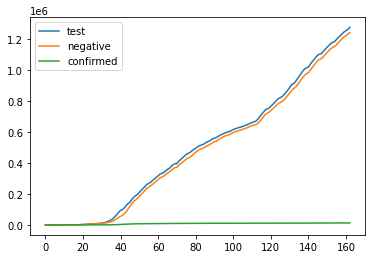

In [82]:
time_csv.plot()

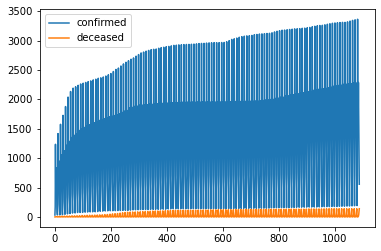

In [83]:
timeage_csv.plot()

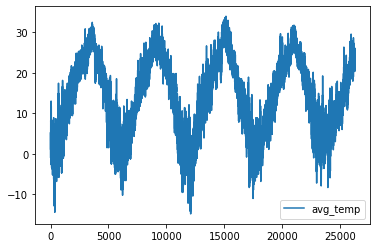

In [84]:
weather_csv.plot()

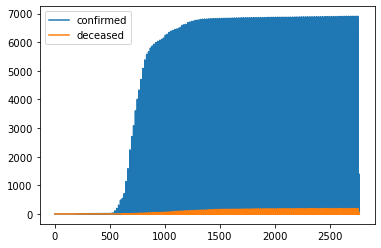

In [85]:
timeprovince_csv.plot()

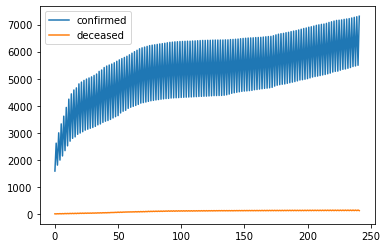

In [86]:
timegender_csv.plot()

In [89]:
timegender_csv_aggregated=timegender_csv.groupby("sex").sum()

In [90]:
timegender_csv_aggregated.head(10)

,confirmed,deceased
sex,,
female,747467,12019
male,513727,13484


In [91]:
timegender_csv_aggregated.shape

(2, 2)

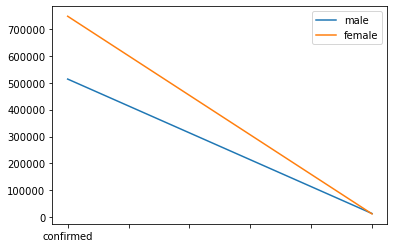

In [93]:
timegender_csv_aggregated.loc['male'].plot()
timegender_csv_aggregated.loc['female'].plot()
plt.legend()

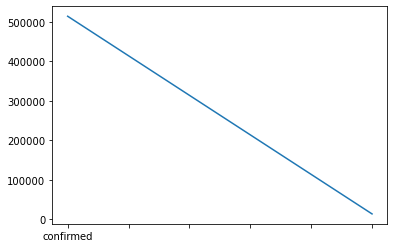

In [94]:
timegender_csv_aggregated.loc['male'].plot()

In [ ]:
timegender_csv_aggregated.loc['female'].diff().plot()